# Python Project - (Prosper Loan Data Visualization)

## by Chinwe Ifeonye

## Introduction

The data set,contains 113,937 loans with 81 variables on each side, including loan status, borrow state,borrow rate, current loan status, and many others. The primary goals of this project is to describe the features of factors that might impact loan status, get some insight into the interactions between numerous variables by exploiting summary statistics and data visualizations.


### Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('prosper loan.csv')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df =pd.read_csv('prosper loan.csv')

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Selecting the few features I will be working with for the exploration
sel_col = ['BorrowerAPR', 'BorrowerRate', 'IncomeRange', 'CreditGrade', 'ClosedDate', 'CurrentCreditLines', 
           'DebtToIncomeRatio', 'EmploymentStatus', 'EstimatedLoss', 'EstimatedReturn', 'IncomeVerifiable', 'Investors',
           'LoanStatus', 'MonthlyLoanPayment', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper','LoanOriginalAmount', 'Occupation', 'ProsperRating (Alpha)','Term']
new_df = df[sel_col]
new_df.head()

,BorrowerAPR,BorrowerRate,IncomeRange,CreditGrade,ClosedDate,CurrentCreditLines,DebtToIncomeRatio,EmploymentStatus,EstimatedLoss,EstimatedReturn,IncomeVerifiable,Investors,LoanStatus,MonthlyLoanPayment,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,Occupation,ProsperRating (Alpha),Term
0,0.16516,0.1580,"$25,000-49,999",C,14/08/2009 00:00,5.0,0.17,Self-employed,NaN,NaN,True,258,Completed,330.43,True,659.0,9425,Other,NaN,36
1,0.12016,0.0920,"$50,000-74,999",NaN,NaN,14.0,0.18,Employed,0.0249,0.05470,True,1,Current,318.93,False,699.0,10000,Professional,A,36
2,0.28269,0.2750,Not displayed,HR,17/12/2009 00:00,NaN,0.06,Not available,NaN,NaN,True,41,Completed,123.32,False,499.0,3001,Other,NaN,36
3,0.12528,0.0974,"$25,000-49,999",NaN,NaN,5.0,0.15,Employed,0.0249,0.06000,True,158,Current,321.45,True,819.0,10000,Skilled Labor,A,36
4,0.24614,0.2085,"$100,000+",NaN,NaN,19.0,0.26,Employed,0.0925,0.09066,True,20,Current,563.97,True,699.0,15000,Executive,D,36


In [6]:
# copy data before cleaning
new_df_clean = new_df.copy()

In [7]:
new_df_clean 

,BorrowerAPR,BorrowerRate,IncomeRange,CreditGrade,ClosedDate,CurrentCreditLines,DebtToIncomeRatio,EmploymentStatus,EstimatedLoss,EstimatedReturn,IncomeVerifiable,Investors,LoanStatus,MonthlyLoanPayment,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,Occupation,ProsperRating (Alpha),Term
0,0.16516,0.1580,"$25,000-49,999",C,14/08/2009 00:00,5.0,0.17,Self-employed,NaN,NaN,True,258,Completed,330.43,True,659.0,9425,Other,NaN,36
1,0.12016,0.0920,"$50,000-74,999",NaN,NaN,14.0,0.18,Employed,0.0249,0.05470,True,1,Current,318.93,False,699.0,10000,Professional,A,36
2,0.28269,0.2750,Not displayed,HR,17/12/2009 00:00,NaN,0.06,Not available,NaN,NaN,True,41,Completed,123.32,False,499.0,3001,Other,NaN,36
3,0.12528,0.0974,"$25,000-49,999",NaN,NaN,5.0,0.15,Employed,0.0249,0.06000,True,158,Current,321.45,True,819.0,10000,Skilled Labor,A,36
4,0.24614,0.2085,"$100,000+",NaN,NaN,19.0,0.26,Employed,0.0925,0.09066,True,20,Current,563.97,True,699.0,15000,Executive,D,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,"$50,000-74,999",NaN,NaN,9.0,0.13,Employed,0.0699,0.09500,True,1,Current,364.74,True,719.0,10000,Food Service Management,C,36
113933,0.13220,0.1110,"$75,000-99,999",NaN,NaN,14.0,0.11,Employed,0.0200,0.08070,True,22,FinalPaymentInProgress,65.57,True,719.0,2000,Professional,A,36
113934,0.23984,0.2150,"$25,000-49,999",NaN,NaN,12.0,0.51,Employed,0.1025,0.08578,True,119,Current,273.35,True,719.0,10000,Other,D,60
113935,0.28408,0.2605,"$25,000-49,999",NaN,13/08/2013 00:00,11.0,0.48,Full-time,0.0850,0.15950,True,274,Completed,449.55,True,699.0,15000,Food Service,C,60


In [8]:
#Eliminating rolls with empty occupation and rating
das = ['Occupation', 'ProsperRating (Alpha)']

for ds in das:
    new_df_clean = new_df_clean[~new_df_clean[ds].isnull()]
    
new_df_clean


,BorrowerAPR,BorrowerRate,IncomeRange,CreditGrade,ClosedDate,CurrentCreditLines,DebtToIncomeRatio,EmploymentStatus,EstimatedLoss,EstimatedReturn,IncomeVerifiable,Investors,LoanStatus,MonthlyLoanPayment,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,Occupation,ProsperRating (Alpha),Term
1,0.12016,0.0920,"$50,000-74,999",NaN,NaN,14.0,0.18,Employed,0.0249,0.05470,True,1,Current,318.93,False,699.0,10000,Professional,A,36
3,0.12528,0.0974,"$25,000-49,999",NaN,NaN,5.0,0.15,Employed,0.0249,0.06000,True,158,Current,321.45,True,819.0,10000,Skilled Labor,A,36
4,0.24614,0.2085,"$100,000+",NaN,NaN,19.0,0.26,Employed,0.0925,0.09066,True,20,Current,563.97,True,699.0,15000,Executive,D,36
5,0.15425,0.1314,"$100,000+",NaN,NaN,21.0,0.36,Employed,0.0449,0.07077,True,1,Current,342.37,True,759.0,15000,Professional,B,60
6,0.31032,0.2712,"$25,000-49,999",NaN,NaN,10.0,0.27,Employed,0.1275,0.11070,True,1,Current,122.67,False,699.0,3000,Sales - Retail,E,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,"$50,000-74,999",NaN,NaN,9.0,0.13,Employed,0.0699,0.09500,True,1,Current,364.74,True,719.0,10000,Food Service Management,C,36
113933,0.13220,0.1110,"$75,000-99,999",NaN,NaN,14.0,0.11,Employed,0.0200,0.08070,True,22,FinalPaymentInProgress,65.57,True,719.0,2000,Professional,A,36
113934,0.23984,0.2150,"$25,000-49,999",NaN,NaN,12.0,0.51,Employed,0.1025,0.08578,True,119,Current,273.35,True,719.0,10000,Other,D,60
113935,0.28408,0.2605,"$25,000-49,999",NaN,13/08/2013 00:00,11.0,0.48,Full-time,0.0850,0.15950,True,274,Completed,449.55,True,699.0,15000,Food Service,C,60


In [9]:
# drop column no longer with 0 records
new_df_clean.drop('ClosedDate', axis=1, inplace=True)

In [10]:
new_df_clean

,BorrowerAPR,BorrowerRate,IncomeRange,CreditGrade,CurrentCreditLines,DebtToIncomeRatio,EmploymentStatus,EstimatedLoss,EstimatedReturn,IncomeVerifiable,Investors,LoanStatus,MonthlyLoanPayment,IsBorrowerHomeowner,CreditScoreRangeUpper,LoanOriginalAmount,Occupation,ProsperRating (Alpha),Term
1,0.12016,0.0920,"$50,000-74,999",NaN,14.0,0.18,Employed,0.0249,0.05470,True,1,Current,318.93,False,699.0,10000,Professional,A,36
3,0.12528,0.0974,"$25,000-49,999",NaN,5.0,0.15,Employed,0.0249,0.06000,True,158,Current,321.45,True,819.0,10000,Skilled Labor,A,36
4,0.24614,0.2085,"$100,000+",NaN,19.0,0.26,Employed,0.0925,0.09066,True,20,Current,563.97,True,699.0,15000,Executive,D,36
5,0.15425,0.1314,"$100,000+",NaN,21.0,0.36,Employed,0.0449,0.07077,True,1,Current,342.37,True,759.0,15000,Professional,B,60
6,0.31032,0.2712,"$25,000-49,999",NaN,10.0,0.27,Employed,0.1275,0.11070,True,1,Current,122.67,False,699.0,3000,Sales - Retail,E,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,"$50,000-74,999",NaN,9.0,0.13,Employed,0.0699,0.09500,True,1,Current,364.74,True,719.0,10000,Food Service Management,C,36
113933,0.13220,0.1110,"$75,000-99,999",NaN,14.0,0.11,Employed,0.0200,0.08070,True,22,FinalPaymentInProgress,65.57,True,719.0,2000,Professional,A,36
113934,0.23984,0.2150,"$25,000-49,999",NaN,12.0,0.51,Employed,0.1025,0.08578,True,119,Current,273.35,True,719.0,10000,Other,D,60
113935,0.28408,0.2605,"$25,000-49,999",NaN,11.0,0.48,Full-time,0.0850,0.15950,True,274,Completed,449.55,True,699.0,15000,Food Service,C,60


### What is the structure of your dataset?
The data set,contains 83520 loans with 19 variables on each side, including loan status, borrow state,borrow rate, current loan status, and many others.The data set can simply be described to contain data about the individual (borrower) and details about the loan in service.


### What is/are the main feature(s) of interest in your dataset?

Figureing out which features are better for predicting the borrower's loan APR (Annual Percentage Rate).and if the 

Borrower's employment status has any significance on the borrower APR?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that Loan Status and Employment Status will have a strong impact on loan and the features we are trying to explor. Also the Monthly Income will play a role here and the Term (lenght of the loan) may have an effect. SO I will try to invistigate these more.

## Univariate Exploration



#### Exploring Loan Original Amount

Loan Original Amount

what is the highest laon original amount borrowed from the borrower?

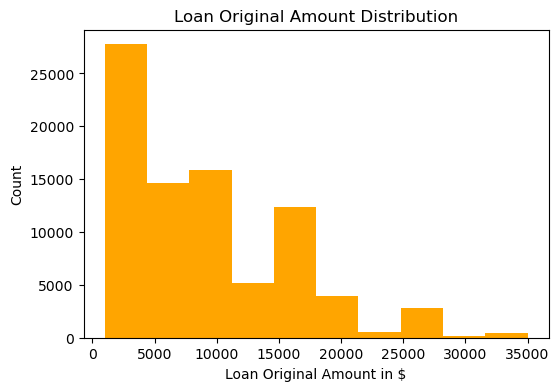

In [26]:
# Loan Original Amount Distribution

plt.figure(figsize=[6, 4])
plt.hist(data =new_df_clean, x = 'LoanOriginalAmount', color = 'orange') 
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()


The highest value for original loan amount is between 3K and 5K. Also I notice increase in amount between 10K and 20K.
So we can see that in years terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months)

##### Exploring the borrower's income range and it frequency

In [12]:
new_df_clean['IncomeRange'].value_counts()

$50,000-74,999    25293
$25,000-49,999    23574
$100,000+         15166
$75,000-99,999    14401
$1-24,999          4392
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

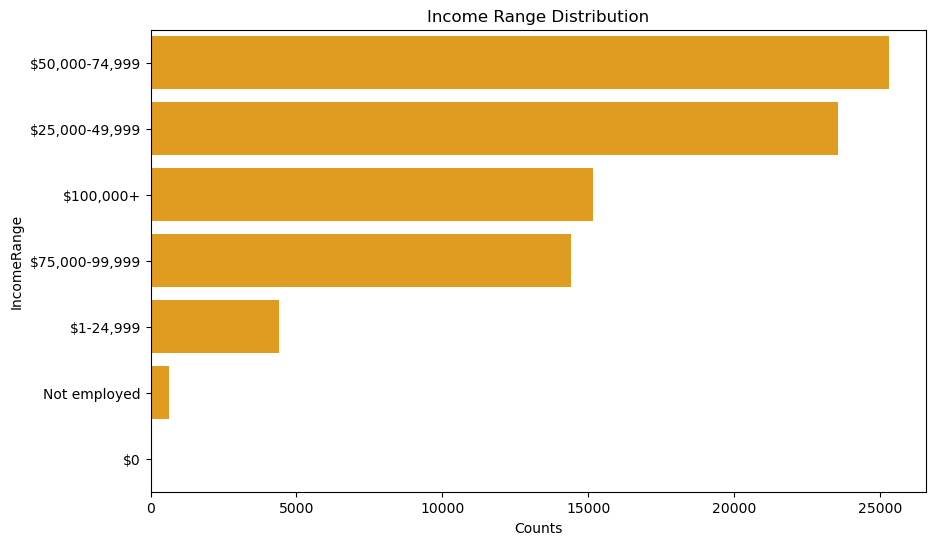

In [13]:
# Distribution based on income range
plt.figure(figsize=[10, 6])
sns.countplot(data = new_df_clean, y = 'IncomeRange', color ='orange')
#plt.xticks(t_props * n_pokemon, t_names)
plt.xlabel('Counts')
plt.title('Income Range Distribution')
plt.show()

This graph depicts the income range of persons that have obtained a loan. It also illustrates that the majority of people who have a loan have an income ranging from 20k to 75k.

In [14]:
#Checking loans' term (expressed in months)

new_df_clean['Term'].value_counts()


36    57621
60    24286
12     1613
Name: Term, dtype: int64

So we can see that in years terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months)

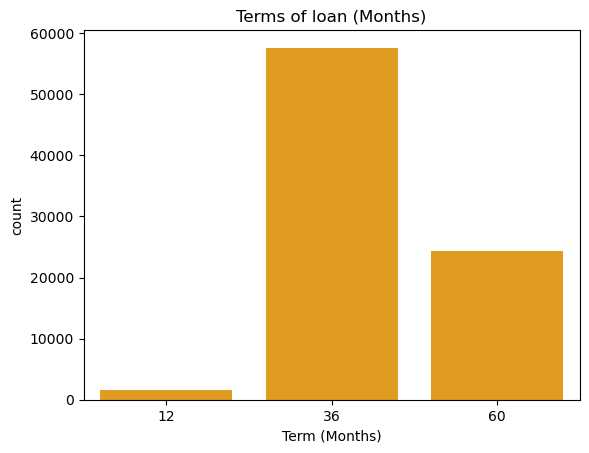

In [15]:
sns.countplot(data=new_df_clean,x= 'Term',color='orange');
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

Here we see that most of the values are in 3 years (36 months)

What are the various ProsperRatings (Alpha) and their distribution allocation in the dataset?

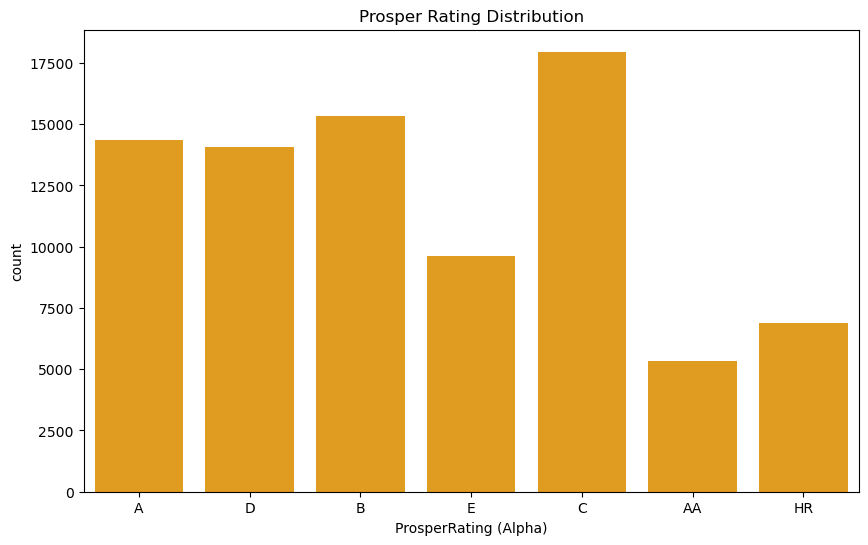

In [16]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sns.countplot(data=new_df_clean,x='ProsperRating (Alpha)',color='orange');
plt.title('Prosper Rating Distribution');

There are 8 different ProsperRating (Alpha) at the moment. Most borrowers get Prosper Rating of 'C'

#### Exploring the Income Range Status 

What's the income range status of the borrowers?

Text(0.5, 1.0, 'Borrower Income Range Distribution')

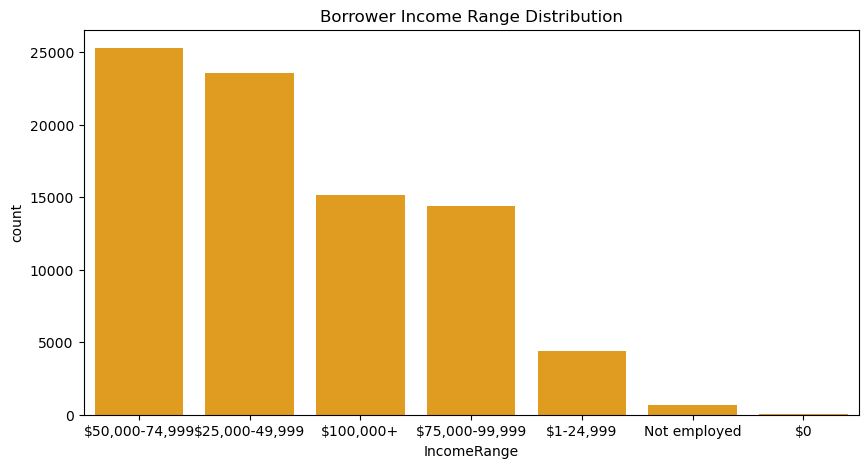

In [17]:
#Borrower Income Range Status Distrobution

plt.figure(figsize=[10, 5])
sns.countplot(data=new_df_clean,x='IncomeRange',color='orange'); 
plt.title('Borrower Income Range Distribution')

We can see that people with income range of $50,000-49,999 are the ones who are taking loans most

I shows that most of the values are in the 3 years (36 months)

#### Exploring the bowwer's Estimated return and it frequency

At what percentage do we have most borrowers lending from the company?

<Figure size 1000x500 with 0 Axes>

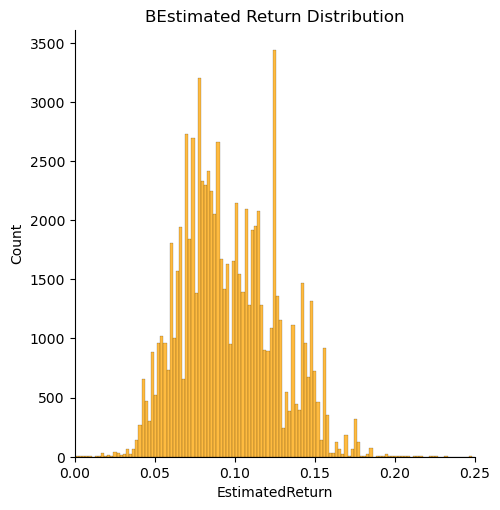

In [25]:
# histogram plot distribution for the estimated return

plt.figure(figsize = [10,5])
arange=(0, new_df_clean['EstimatedReturn'].max(), 0.0015)
sns.displot(new_df_clean['EstimatedReturn'], color = 'orange') 
plt.xlabel('EstimatedReturn')
plt.xlim(0, .25)
plt.ylabel('Count')
plt.title('BEstimated Return Distribution')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The indicated monthly income distributions are severely skewed to the right. The majority of monthly salaries are in the range of 25,000 - 75,000, while some are really high, exceeding 100k. Surprisingly, most borrowers, having a comfortable income range, have a monthly repayment plan of 1,000 or less. This simply implies that borrowers are applying for a lower loan value despite having the capacity to go for a higher value.

In order to ensure every borrower in this data has the ability to fulfill their commitment, data of borrowers without occupation and rating were dropped.

## Bivariate Exploration



what is the relationship between Estimated Return and BorrowerAPR? 

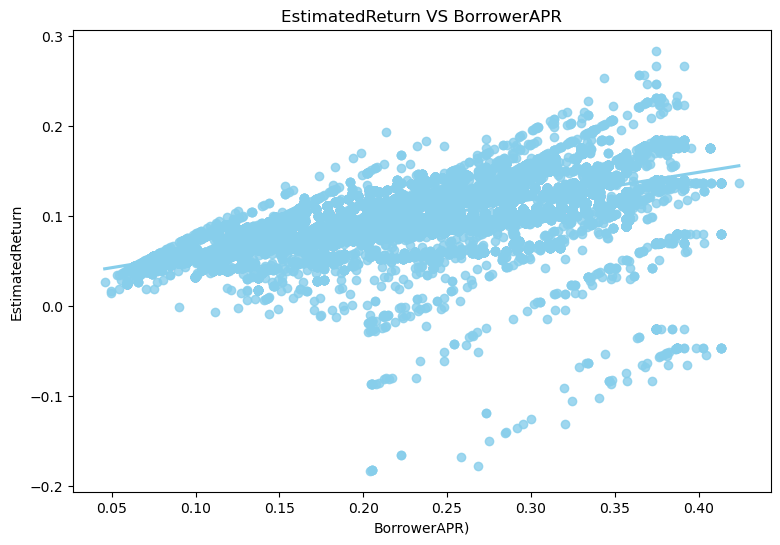

In [33]:
# What's the relationship between estimated return and borrowerAPR

plt.figure(figsize = [9,6])
sns.regplot(data = new_df_clean, x = 'BorrowerAPR', y = 'EstimatedReturn', color = 'skyblue');
plt.xlabel('BorrowerAPR)')
plt.ylabel('EstimatedReturn')
plt.title('EstimatedReturn VS BorrowerAPR')
plt.show()


The regression line in a scatter plot showing a negative correlation between the two variables.

find the relationship between BorrowerAPR VS Status of Loan 

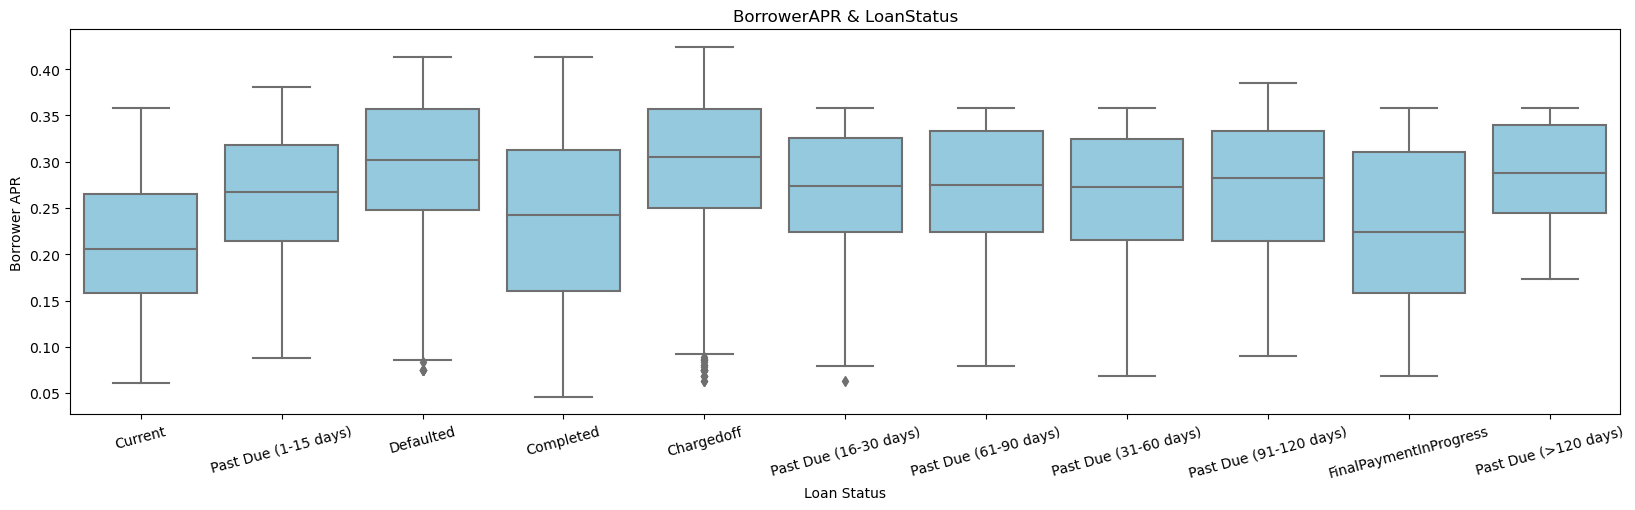

In [32]:
# Borrower APR vs Status of Loan 

plt.figure(figsize = [20, 5])
sns.boxplot(data=new_df_clean,y='BorrowerAPR',x='LoanStatus',color='skyblue');
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);


in this image,BorrowerAPR vs LoanStatus graph, note that Current and completed loans have lower rate than the past-due loans and have lower mean.

###### Comparing two plot to examine the relationship?

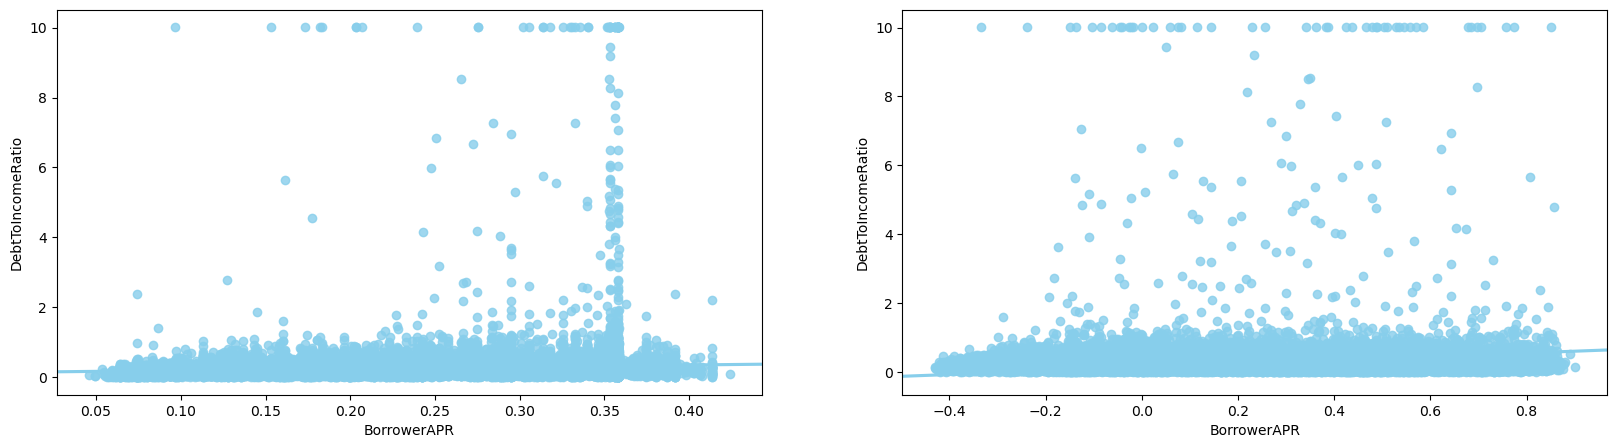

In [36]:
# checking for relation between debt to income ration and borrowerAPR

plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.regplot(data = new_df_clean, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', truncate=False , color = 'skyblue');


plt.subplot(1, 2, 2)
sns.regplot(data = new_df_clean, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', truncate=False, x_jitter=0.5 , color = 'skyblue');

 finding the BorrowerAPR VS Employment Status

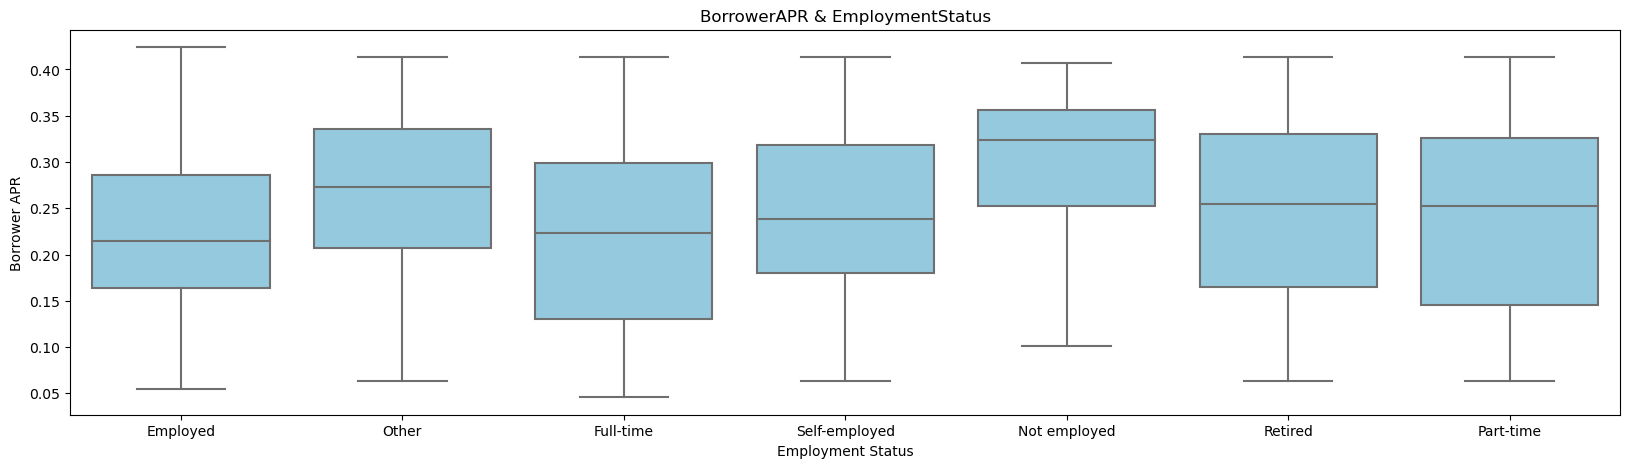

In [38]:
# Borrower APR vs Employment status

plt.figure(figsize = [20, 5])

sns.boxplot(data=new_df_clean,y='BorrowerAPR',x='EmploymentStatus',color= 'skyblue');
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

Borrower APR vs Employment status graph, notice that Employed people have lower IQR than not employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan status for the past dues have a high interest rate.
Number of Defaulted loans for Self-employed people are larger than those for Not Employed

## Conclusions

This research uses a Prosper loan dataset with 81 variables and 113,937 observations. With so many variables to consider, it will take a long time, if not weeks. As a result, some variables were chosen among others that could give additional details based on the element of the data that I am interested in.

The data was analyzed in order to properly grasp each variable to make sense of the data. The BorrowerAPR became the key focus of the investigation.

The data was cleared of empty roles, particularly BorrowerAPR, during the wrangling step. In addition, column(s) with no data after the initial cleansing were removed from the list of variables. The goal of the cleaning is to guarantee that the data that was analyzed can satisfy their obligations.

Borrower APR is negatively related to monthly payback, which means that the higher the repayment amount, the lower the APR. The data also show that the lower the BorrowerAPR, the better the Current Credit line.

Furthermore, there is also a slight negative correlation between BorrowerAPR and work status. This indicates that someone that is employed, has their own business, or work as part-time has a lower BorrowerAPR compared to either unemployed, retired or others.

The data reveals that for all terms, there are more loans on 12-month terms compared to other terms across all salary ranges of the borrowers. Also, an income range of above $100,000 has the highest monthly repayment for all the repayment terms.



